In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/stundenwerte_FF_03730_19510101_20221231_hist/produkt_ff_stunde_19510101_20221231_03730.txt", sep=";")

In [3]:
df.head()

,STATIONS_ID,MESS_DATUM,QN_3,F,D,eor
0,3730,1951010100,5,1.0,-999,eor
1,3730,1951010101,5,0.5,-999,eor
2,3730,1951010102,5,1.3,-999,eor
3,3730,1951010103,5,0.7,-999,eor
4,3730,1951010104,5,0.7,-999,eor


In [4]:
df['time'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H')
df = df.set_index(pd.DatetimeIndex(df['time']))

In [5]:
df = df.drop("MESS_DATUM", axis=1)
df = df.drop("STATIONS_ID", axis=1)
df = df.drop("eor", axis=1)
df = df.drop("time", axis=1)
df["Force"] = df["   F"]
df["Direction"] = df["   D"]

df = df.drop("   F", axis=1)
df = df.drop("   D", axis=1)

df.head()

,QN_3,Force,Direction
time,,,
1951-01-01 00:00:00,5,1.0,-999
1951-01-01 01:00:00,5,0.5,-999
1951-01-01 02:00:00,5,1.3,-999
1951-01-01 03:00:00,5,0.7,-999
1951-01-01 04:00:00,5,0.7,-999


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 629886 entries, 1951-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   QN_3       629886 non-null  int64  
 1   Force      629886 non-null  float64
 2   Direction  629886 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 19.2 MB


In [7]:
df = df[df["Force"] >= 0]
df = df[df["Direction"] >= 0]
df = df[df["Direction"] <= 360]

<AxesSubplot:xlabel='time'>

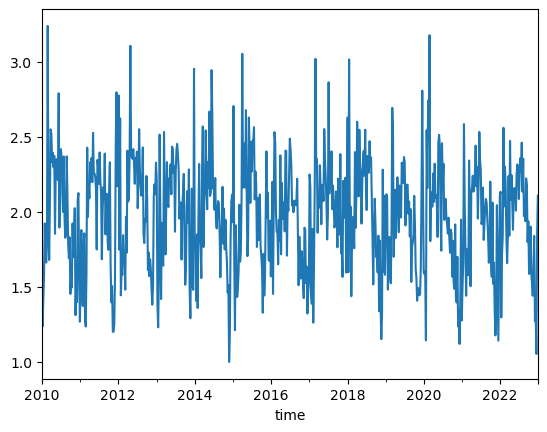

In [45]:
df[(df.index > '2010-1-1')]["Force"].groupby(pd.Grouper(freq='w')).mean().plot()
# df[(df.index > '2018-1-1')]["Direction"].groupby(pd.Grouper(freq='w')).mean().plot()

<AxesSubplot:xlabel='time'>

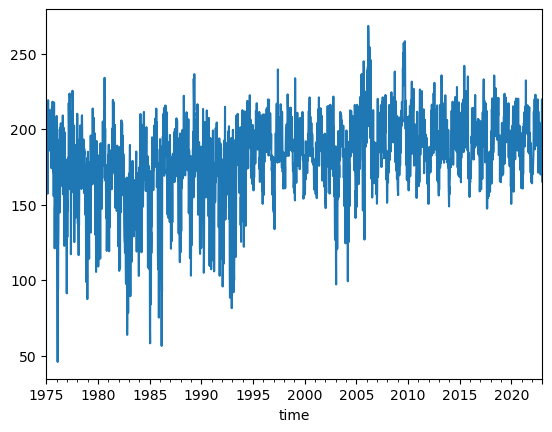

In [46]:
df["Direction"].groupby(pd.Grouper(freq='W')).mean().plot()

<AxesSubplot:xlabel='time'>

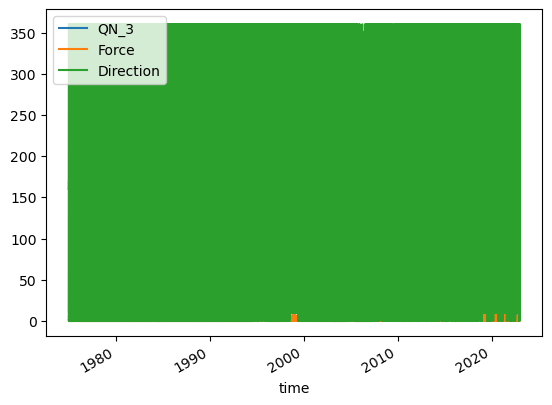

In [10]:
df.plot()